# Fitting hemodynamic response function for a single trial

## A `scipy` version

This notebook presents fitting modeled hemodynamic response function (HRF) for a single trial of planning functional grasps condition. This single-trial example uses 17 volumes of BOLD fMRI signal (17 signal time points). The signal comes from one of the runs of one of the participants. The expected signal timecourse was already modeled with FSL and it is stored in a `design.mat` file.

### General introduction

What will be presented here can be summarized on the Figure below:

![Single voxel timecourse](images/Single%20voxel%20timecourse.png)

Figure adapted from: [Eloyan et al., 2014 - _Analytic Programming with fMRI Data: A Quick-Start Guide for Statisticians Using R_](https://www.researchgate.net/publication/260448116_Analytic_Programming_with_fMRI_Data_A_Quick-Start_Guide_for_Statisticians_Using_R/figures?lo=1&utm_source=google&utm_medium=organic).

We selected a single voxel, extracted signal timecourse from it, and we will be comparing that signal with the expected timecourse, as predicted with the general linear model (GLM).


### More information about the data

The best fit voxel location (19, 43, 25) was already known, based on a separate analysis.

The signal comes from functional grasp planning task, see:

Przybylski, Ł., & Kroliczak, G. (2017). Planning Functional Grasps of Simple Tools Invokes the Hand-independent Praxis Representation Network: An fMRI Study. Journal of the International Neuropsychological Society, 23(02), 108–120. https://doi.org/10.1017/S1355617716001120

and

Buchwald, M., Przybylski, Ł., & Kroliczak, G. (2018). Decoding Brain States for Planning Functional Grasps of Tools: A Functional Magnetic Resonance Imaging Multivoxel Pattern Analysis Study. Journal of the International Neuropsychological Society, 24(10), 1013–1025. https://doi.org/10.1017/S1355617718000590

This example uses a `scipy` Python module to model the signal and calculate a parameter estimate (i.e., a slope of the regression line).

For example of modelling the signal (here only fitting is presented) see: http://www.jarrodmillman.com/rcsds/lectures/convolution_background.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nilearn import image
from scipy import stats

In [2]:
design = np.loadtxt('data/single_trial/design.mat')
design

array([ -8.74696 ,   1.539723,  35.68112 ,  49.17466 ,  30.03663 ,
         7.700465,  -5.939874, -12.29698 , -14.20883 , -13.7046  ,
       -12.28538 , -10.89485 ,  -9.90825 ,  -9.333189,  -9.042936,
        -8.912189,  -8.858559])

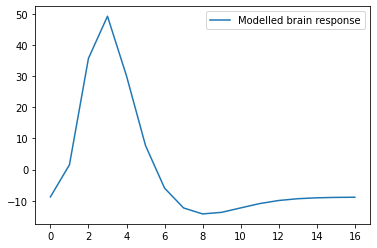

In [3]:
plt.plot(design, label='Modelled brain response')
plt.legend()
plt.show()

Acquired signal time-course for a single voxel. This voxel was indicated with FEAT as the one with the best fit to the modelled time-course.

In [4]:
data = image.load_img('data/single_trial/planning.nii.gz').get_fdata()[19, 43, 25, :]
data

array([12957.16210938, 13013.44042969, 13155.16503906, 13207.12695312,
       13197.60742188, 13034.83984375, 12984.20117188, 12925.64941406,
       12927.640625  , 13016.82519531, 12982.36914062, 13018.98144531,
       13012.48925781, 13012.43847656, 12997.41308594, 12943.59960938,
       12981.78222656])

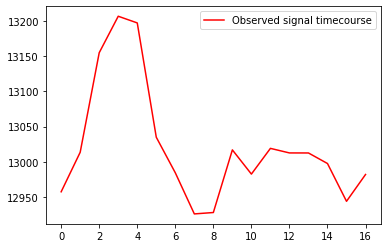

In [5]:
plt.plot(data, 'r', label='Observed signal timecourse')
plt.legend()
plt.show()

In [6]:
slope, intercept, r_value, p_value, stderr = stats.linregress(design, data)

print('Constant (intercept):    %.3f' % intercept)
print('Parameter estimate (PE): %.3f' % slope)
print('R squared:               %.3f' % r_value**2)
print('p value:                 %.25f' % p_value)
print('Standard error*:         %.3f' % stderr)
print('')
print(' * Standard error of the estimate')

Constant (intercept):    13021.690
Parameter estimate (PE): 4.096
R squared:               0.860
p value:                 0.0000000845842278958545510
Standard error*:         0.426

 * Standard error of the estimate


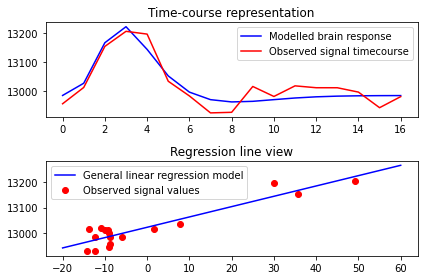

In [7]:
model_fit = design * slope + intercept
residuals = design-model_fit

plt.subplot(2,1,1)
plt.title('Time-course representation')
plt.plot(model_fit, color='b', label='Modelled brain response')
plt.plot(data, color='r', label='Observed signal timecourse')
plt.legend()

xx = np.linspace(-20, 60, 2)
yy = np.array(intercept + slope * xx)

plt.subplot(2,1,2)
plt.title('Regression line view')
plt.plot(xx, yy.T, color='b', label='General linear regression model')
plt.scatter(design, data, color='r', label='Observed signal values')
plt.legend()

plt.tight_layout()
plt.show()

## Further reading and additional materials

---

![Voxel time courses CREx](images/Voxel%20time%20courses%2C%20CREx.png)

Source: [CREx, Institute of Language, Communication and the Braib (ILCB)](https://blricrex.hypotheses.org/ressources/fmri)

---

![Medium, scaled fMRI response](images/Medium%2C%20scaled%20fMRI%20response.png)

Source: [a Medium article by Carsten Klein](https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-c68fcd595d5f)

---

![Chou et al., Spatio-temporal fMRI data](images/Chou%20et%20al.%2C%20Spatio-temporal%20fMRI%20data.png)

Source: [Chou et al., - _IEEE Transactions on Medical Imaging_](https://www.researchgate.net/publication/261222773_Voxel_Selection_Framework_in_Multi-Voxel_Pattern_Analysis_of_fMRI_Data_for_Prediction_of_Neural_Response_to_Visual_Stimuli)

---